In [12]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [17]:
df=pd.read_csv("emails.csv")


In [18]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [19]:
print("Spam Count:"+str(len(df.loc[df.spam==1])))
print("Not Spam:"+str(len(df.loc[df.spam==0])))
print(df.shape)

df=df.drop_duplicates()
print(df.shape)

df=df.reset_index(inplace=False)[['text','spam']]

Spam Count:1368
Not Spam:4360
(5728, 2)
(5695, 2)


In [20]:
print(df.shape)

(5695, 2)


In [21]:
df['spam'].unique()

array([1, 0], dtype=int64)

In [22]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [25]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()
        
df.head(3)

,level_0,index,text,spam
0,0,0,subject naturally irresistible your corporate ...,1
1,1,1,subject the stock trading gunslinger fanny is ...,1
2,2,2,subject unbelievable new homes made easy im wa...,1


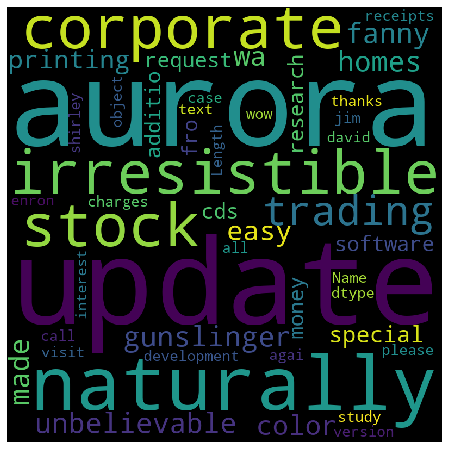

In [26]:

df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

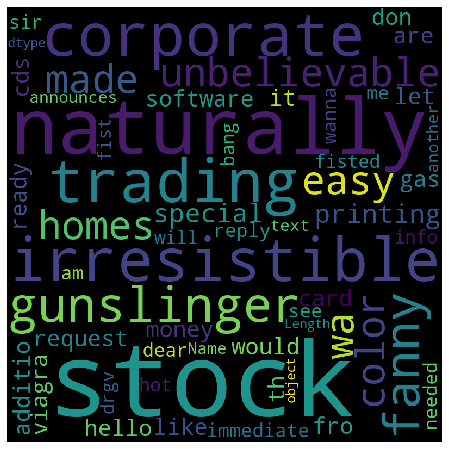

In [27]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

# tokenize and build vocab
cv.fit(text)

# summarize
print(cv.vocabulary_)

# encode document
vector = cv.transform(text)

# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer().fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

from sklearn import ensemble 
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #controls rate at which additional decision trees influes overall prediction
    max_depth = 6, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [30]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00       731

    accuracy                           1.00      3132
   macro avg       1.00      1.00      1.00      3132
weighted avg       1.00      1.00      1.00      3132

Confusion Matrix: 
 [[2401    0]
 [   0  731]]

Accuracy:  1.0


In [31]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563

Confusion Matrix: 
 [[1914   12]
 [  61  576]]

Accuracy:  0.9715177526336325


In [32]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,level_0,index,text,spam,tb_Pol,tb_Subj
0,0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581
